In [9]:
# For reference   

 # info_dict = {
    #     "game_id": unique_game_id,
    #     "transcript": game_state,
    #     "result": result,
    #     "player_one": player_one_title,
    #     "player_two": player_two_title,
    #     "player_one_score": player_one_score,
    #     "player_two_score": player_two_score,
    #     "player_one_illegal_moves": player_one_illegal_moves,
    #     "player_two_illegal_moves": player_two_illegal_moves,
    #     "player_one_resignation": player_one_resignation,
    #     "player_two_resignation": player_two_resignation,
    #     "game_title": f"{player_one_title} vs. {player_two_title}",
    #     "number_of_moves": board.fullmove_number,
    #     "time_taken": total_time,
    # }

game_title
gpt-3.5-turbo-instruct vs. Stockfish 0    1.000000
gpt-3.5-turbo-instruct vs. Stockfish 1    0.866667
gpt-3.5-turbo-instruct vs. Stockfish 2    0.666667
gpt-3.5-turbo-instruct vs. Stockfish 3    0.461538
gpt-3.5-turbo-instruct vs. Stockfish 4    0.357143
gpt-3.5-turbo-instruct vs. Stockfish 5    0.250000
Name: player_one_score, dtype: float64


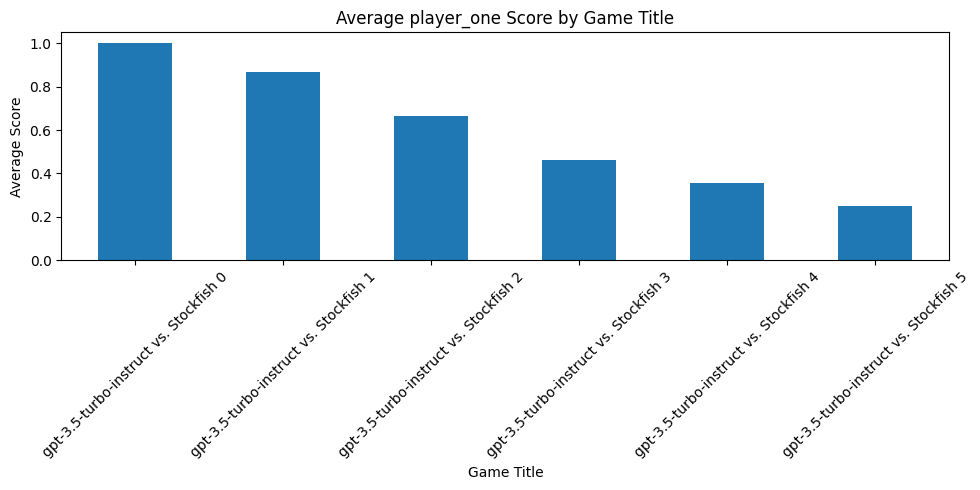

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def graph_player_gpt_score(player: str, df: pd.DataFrame) -> None:
    if player != "player_one" and player != "player_two":
        raise ValueError("player must be either 'player_one' or 'player_two'")
    
    # Convert the player_one_score column to numeric type (if it's not already)
    df[f"{player}_score"] = pd.to_numeric(df[f"{player}_score"], errors="coerce")

    # Compute average score of player_one grouped by game_title
    average_scores = df.groupby("game_title")[f"{player}_score"].mean()

    # Display the result
    print(average_scores)

    average_scores.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
    plt.title(f"Average {player} Score by Game Title")
    plt.ylabel("Average Score")
    plt.xlabel("Game Title")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

df = pd.read_csv("logs/games.csv")

graph_player_gpt_score("player_one", df)


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("logs/games.csv")

# Compute total illegal moves and total moves
total_illegal_moves = df['player_one_illegal_moves'].sum()
total_moves = df['number_of_moves'].sum()

# Calculate the ratio
ratio = total_illegal_moves / total_moves
print(f"total moves: {total_moves}, total illegal moves: {total_illegal_moves}")
# Display the result
print(f"Ratio of Player One's Illegal Moves to Total Moves: {ratio:.4f}")


In [11]:
# Group by player_two_title and count the occurrences
title_counts = df.groupby('game_title').size()

print(title_counts)

# Filter titles with a count less than 30
# titles_less_than_30 = title_counts[title_counts < 30]

# # Display the result
# print(titles_less_than_30)

game_title
gpt-3.5-turbo-instruct vs. Stockfish 0    15
gpt-3.5-turbo-instruct vs. Stockfish 1    15
gpt-3.5-turbo-instruct vs. Stockfish 2    15
gpt-3.5-turbo-instruct vs. Stockfish 3    15
gpt-3.5-turbo-instruct vs. Stockfish 4    15
gpt-3.5-turbo-instruct vs. Stockfish 5     9
dtype: int64
